## $\alpha$ and speed exploration

In [1]:
%%capture --no-display

import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scipy.spatial import distance

# spectrome imports
from spectrome.brain import Brain
from spectrome.utils import functions, path
from spectrome.forward import eigenmode, get_complex_laplacian, runforward

In [2]:
np.divide(1,1j)

-1j

In [2]:
# Some house keeping
hcp_dir = "/home/axiezai/lab/brain-scfc/spectrome/spectrome/data"

# Define frequency range of interest
fmin = 2  # 2Hz - 45Hz signal range, filter for this with hbp
fmax = 45
fvec = np.linspace(fmin, fmax, 40)
f2w = np.abs(fvec - 10).argmin()  # 8th index = alpha ~10hz
w = 2 * np.pi * fvec[f2w]

## Creating HCP Brain object

In [3]:
HCP_brain = Brain.Brain()
HCP_brain.add_connectome(hcp_dir)
HCP_brain.reorder_connectome(HCP_brain.connectome, HCP_brain.distance_matrix)
HCP_brain.bi_symmetric_c()
HCP_brain.reduce_extreme_dir()
HCP_brain.add_laplacian_eigenmodes(
    w=w,
    alpha=0.5,
    speed=10,
    num_ev=86,
)
HCP_brain.norm_eigenmodes.shape

(86, 86)

#### Visualize both the connectome and eigenmodes:

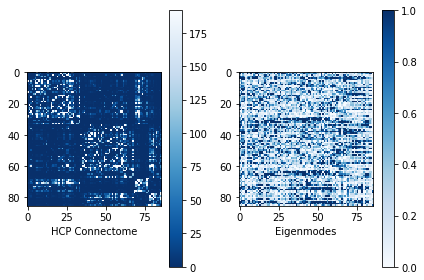

In [4]:
plt.subplot(1,2,1)
plt.imshow(HCP_brain.reducedConnectome, cmap=plt.cm.Blues_r)
plt.colorbar()
plt.xlabel('HCP Connectome')
plt.subplot(1,2,2)
plt.imshow(HCP_brain.norm_eigenmodes,cmap=plt.cm.Blues)
plt.xlabel('Eigenmodes')
plt.colorbar()
plt.tight_layout()

Text(0.5, 0, 'Eigenmode #')

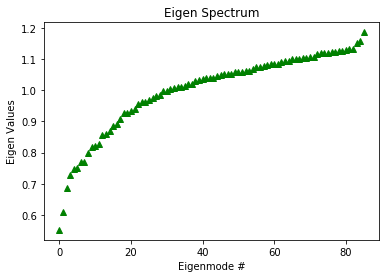

In [5]:
# plot eigen spectrum
plt.plot(np.abs(HCP_brain.eigenvalues),'g^')
plt.title('Eigen Spectrum')
plt.ylabel('Eigen Values')
plt.xlabel('Eigenmode #')

In [6]:
## Polar coordinates with imaginary/axis + frequency response of eigenmodes
default_params = (
    HCP_brain.ntf_params
)  # re-defining the default parameters for the model
default_params[
    "speed"
] = (
    15
)  # change default speed to 10 to stay consistent with the rest of the eigenmode analysis defaults

default_params[
    "alpha"
] = (
    0.5
)

freq_model, frequency_response, ev, vv = runforward.run_forward(HCP_brain, default_params, fvec)

### Firstly with alpha in the model and the Laplacian term:

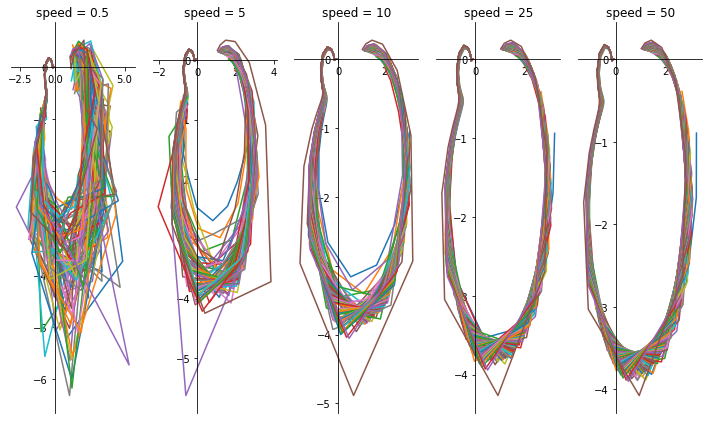

In [7]:
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, sharey = False, figsize = (10,6))
default_params["alpha"] = 0.5
default_params["speed"] = 0.5
freq_model, frequency_response, ev, vv = runforward.run_local_coupling_forward(HCP_brain, default_params, fvec)
ax1.plot(frequency_response[:,:].real, frequency_response[:,:].imag)
ax1.spines["left"].set_position("zero")
ax1.spines["right"].set_color("none")
ax1.spines["bottom"].set_position("zero")
ax1.spines["top"].set_color("none")
ax1.title.set_text("speed = {}".format(default_params["speed"]))

#plt.subplot(1,5,2)
default_params["speed"] = 5
freq_model, frequency_response, ev, vv = runforward.run_local_coupling_forward(HCP_brain, default_params, fvec)
ax2.plot(frequency_response[:,:].real, frequency_response[:,:].imag)
ax2.spines["left"].set_position("zero")
ax2.spines["right"].set_color("none")
ax2.spines["bottom"].set_position("zero")
ax2.spines["top"].set_color("none")
ax2.title.set_text("speed = {}".format(default_params["speed"]))

#plt.subplot(1,5,3)
default_params["speed"] = 10
freq_model, frequency_response, ev, vv = runforward.run_local_coupling_forward(HCP_brain, default_params, fvec)
ax3.plot(frequency_response[:,:].real, frequency_response[:,:].imag)
ax3.spines["left"].set_position("zero")
ax3.spines["right"].set_color("none")
ax3.spines["bottom"].set_position("zero")
ax3.spines["top"].set_color("none")
ax3.title.set_text("speed = {}".format(default_params["speed"]))

#plt.subplot(1,5,4)
default_params["speed"] = 25
freq_model, frequency_response, ev, vv = runforward.run_local_coupling_forward(HCP_brain, default_params, fvec)
ax4.plot(frequency_response[:,:].real, frequency_response[:,:].imag)
ax4.spines["left"].set_position("zero")
ax4.spines["right"].set_color("none")
ax4.spines["bottom"].set_position("zero")
ax4.spines["top"].set_color("none")
ax4.title.set_text("speed = {}".format(default_params["speed"]))

#plt.subplot(1,5,5)
default_params["speed"] = 50
freq_model, frequency_response, ev, vv = runforward.run_local_coupling_forward(HCP_brain, default_params, fvec)
ax5.plot(frequency_response[:,:].real, frequency_response[:,:].imag)
ax5.spines["left"].set_position("zero")
ax5.spines["right"].set_color("none")
ax5.spines["bottom"].set_position("zero")
ax5.spines["top"].set_color("none")
ax5.title.set_text("speed = {}".format(default_params["speed"]))
plt.tight_layout()

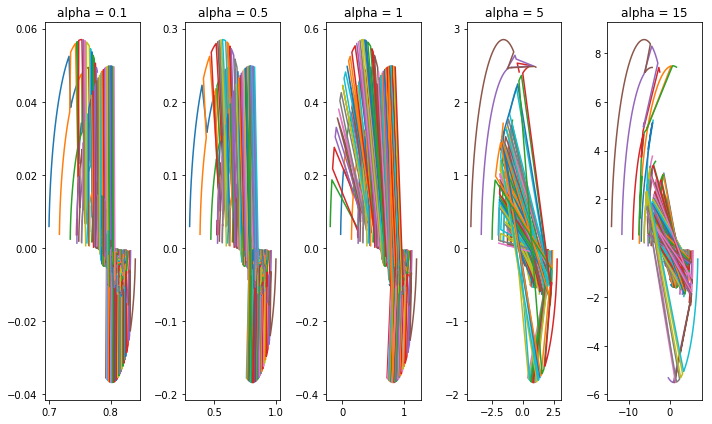

In [17]:
fig2,(ax_1,ax_2,ax_3,ax_4,ax_5) = plt.subplots(1,5, sharey = False, figsize = (10,6))
default_params["alpha"] = 0.1
default_params["speed"] = 10
freq_model, frequency_response, ev, vv = runforward.run_local_coupling_forward(HCP_brain, default_params, fvec)
ax_1.plot(ev[:,:].real, ev[:,:].imag)
#ax_1.spines["left"].set_position("zero")
#ax_1.spines["right"].set_color("none")
#ax_1.spines["bottom"].set_position("zero")
#ax_1.spines["top"].set_color("none")
ax_1.title.set_text("alpha = {}".format(default_params["alpha"]))

default_params["alpha"] = 0.5
freq_model, frequency_response, ev, vv = runforward.run_local_coupling_forward(HCP_brain, default_params, fvec)
ax_2.plot(ev[:,:].real, ev[:,:].imag)
#ax_2.spines["left"].set_position("zero")
#ax_2.spines["right"].set_color("none")
#ax_2.spines["bottom"].set_position("zero")
#ax_2.spines["top"].set_color("none")
ax_2.title.set_text("alpha = {}".format(default_params["alpha"]))

default_params["alpha"] = 1
freq_model, frequency_response, ev, vv = runforward.run_local_coupling_forward(HCP_brain, default_params, fvec)
ax_3.plot(ev[:,:].real, ev[:,:].imag)
#ax_3.spines["left"].set_position("zero")
#ax_3.spines["right"].set_color("none")
#ax_3.spines["bottom"].set_position("zero")
#ax_3.spines["top"].set_color("none")
ax_3.title.set_text("alpha = {}".format(default_params["alpha"]))

default_params["alpha"] = 5
freq_model, frequency_response, ev, vv = runforward.run_local_coupling_forward(HCP_brain, default_params, fvec)
ax_4.plot(ev[:,:].real, ev[:,:].imag)
#ax_4.spines["left"].set_position("zero")
#ax_4.spines["right"].set_color("none")
#ax_4.spines["bottom"].set_position("zero")
#ax_4.spines["top"].set_color("none")
ax_4.title.set_text("alpha = {}".format(default_params["alpha"]))

default_params["alpha"] = 15
freq_model, frequency_response, ev, vv = runforward.run_local_coupling_forward(HCP_brain, default_params, fvec)
ax_5.plot(ev[:,:].real, ev[:,:].imag)
#ax_5.spines["left"].set_position("zero")
#ax_5.spines["right"].set_color("none")
#ax_5.spines["bottom"].set_position("zero")
#ax_5.spines["top"].set_color("none")
ax_5.title.set_text("alpha = {}".format(default_params["alpha"]))
plt.tight_layout()

## Alpha only appearing once with the Laplacian, every local oscillator alpha is replaced to be equal to 1 because we assume all-to-all connection at microscopic scale

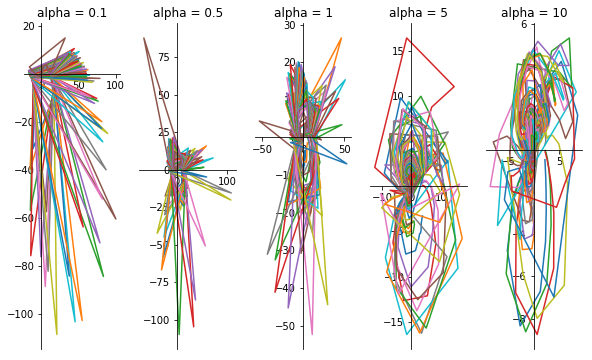

In [9]:
fig_a,(a1,a2,a3,a4,a5) = plt.subplots(1,5, sharey = False, figsize = (10,6))
default_params["speed"] = 10
default_params["alpha"] = 0.1
freq_model, frequency_response, ev, vv = runforward.run_forward(HCP_brain, default_params, fvec)
a1.plot(frequency_response[:,:].real, frequency_response[:,:].imag)
a1.spines["left"].set_position("zero")
a1.spines["right"].set_color("none")
a1.spines["bottom"].set_position("zero")
a1.spines["top"].set_color("none")
a1.title.set_text("alpha = {}".format(default_params["alpha"]))

default_params["alpha"] = 0.5
freq_model, frequency_response, ev, vv = runforward.run_forward(HCP_brain, default_params, fvec)
a2.plot(frequency_response[:,:].real, frequency_response[:,:].imag)
a2.spines["left"].set_position("zero")
a2.spines["right"].set_color("none")
a2.spines["bottom"].set_position("zero")
a2.spines["top"].set_color("none")
a2.title.set_text("alpha = {}".format(default_params["alpha"]))

default_params["alpha"] = 1
freq_model, frequency_response, ev, vv = runforward.run_forward(HCP_brain, default_params, fvec)
a3.plot(frequency_response[:,:].real, frequency_response[:,:].imag)
a3.spines["left"].set_position("zero")
a3.spines["right"].set_color("none")
a3.spines["bottom"].set_position("zero")
a3.spines["top"].set_color("none")
a3.title.set_text("alpha = {}".format(default_params["alpha"]))

default_params["alpha"] = 5
freq_model, frequency_response, ev, vv = runforward.run_forward(HCP_brain, default_params, fvec)
a4.plot(frequency_response[:,:].real, frequency_response[:,:].imag)
a4.spines["left"].set_position("zero")
a4.spines["right"].set_color("none")
a4.spines["bottom"].set_position("zero")
a4.spines["top"].set_color("none")
a4.title.set_text("alpha = {}".format(default_params["alpha"]))

default_params["alpha"] = 10
freq_model, frequency_response, ev, vv = runforward.run_forward(HCP_brain, default_params, fvec)
a5.plot(frequency_response[:,:].real, frequency_response[:,:].imag)
a5.spines["left"].set_position("zero")
a5.spines["right"].set_color("none")
a5.spines["bottom"].set_position("zero")
a5.spines["top"].set_color("none")
a5.title.set_text("alpha = {}".format(default_params["alpha"]))

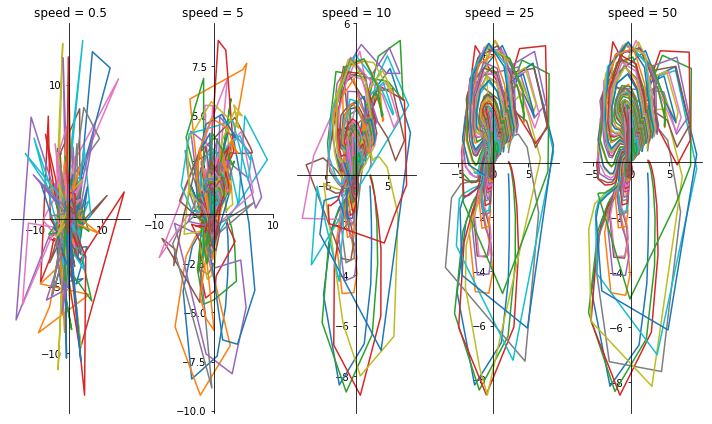

In [11]:
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, sharey = False, figsize = (10,6))
default_params["alpha"] = 10
default_params["speed"] = 0.5
freq_model, frequency_response, ev, vv = runforward.run_forward(HCP_brain, default_params, fvec)
ax1.plot(frequency_response[:,:].real, frequency_response[:,:].imag)
ax1.spines["left"].set_position("zero")
ax1.spines["right"].set_color("none")
ax1.spines["bottom"].set_position("zero")
ax1.spines["top"].set_color("none")
ax1.title.set_text("speed = {}".format(default_params["speed"]))

#plt.subplot(1,5,2)
default_params["speed"] = 5
freq_model, frequency_response, ev, vv = runforward.run_forward(HCP_brain, default_params, fvec)
ax2.plot(frequency_response[:,:].real, frequency_response[:,:].imag)
ax2.spines["left"].set_position("zero")
ax2.spines["right"].set_color("none")
ax2.spines["bottom"].set_position("zero")
ax2.spines["top"].set_color("none")
ax2.title.set_text("speed = {}".format(default_params["speed"]))

#plt.subplot(1,5,3)
default_params["speed"] = 10
freq_model, frequency_response, ev, vv = runforward.run_forward(HCP_brain, default_params, fvec)
ax3.plot(frequency_response[:,:].real, frequency_response[:,:].imag)
ax3.spines["left"].set_position("zero")
ax3.spines["right"].set_color("none")
ax3.spines["bottom"].set_position("zero")
ax3.spines["top"].set_color("none")
ax3.title.set_text("speed = {}".format(default_params["speed"]))

#plt.subplot(1,5,4)
default_params["speed"] = 25
freq_model, frequency_response, ev, vv = runforward.run_forward(HCP_brain, default_params, fvec)
ax4.plot(frequency_response[:,:].real, frequency_response[:,:].imag)
ax4.spines["left"].set_position("zero")
ax4.spines["right"].set_color("none")
ax4.spines["bottom"].set_position("zero")
ax4.spines["top"].set_color("none")
ax4.title.set_text("speed = {}".format(default_params["speed"]))

#plt.subplot(1,5,5)
default_params["speed"] = 50
freq_model, frequency_response, ev, vv = runforward.run_forward(HCP_brain, default_params, fvec)
ax5.plot(frequency_response[:,:].real, frequency_response[:,:].imag)
ax5.spines["left"].set_position("zero")
ax5.spines["right"].set_color("none")
ax5.spines["bottom"].set_position("zero")
ax5.spines["top"].set_color("none")
ax5.title.set_text("speed = {}".format(default_params["speed"]))
plt.tight_layout()

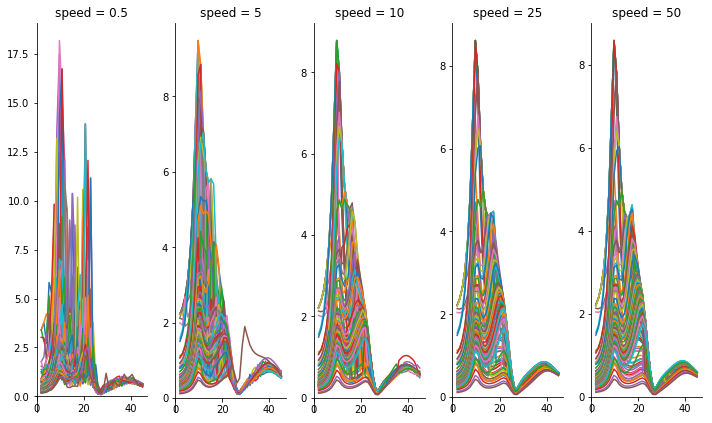

In [12]:
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, sharey = False, figsize = (10,6))
default_params["alpha"] = 10
default_params["speed"] = 0.5
freq_model, frequency_response, ev, vv = runforward.run_forward(HCP_brain, default_params, fvec)
ax1.plot(fvec,np.abs(frequency_response))
ax1.spines["left"].set_position("zero")
ax1.spines["right"].set_color("none")
ax1.spines["bottom"].set_position("zero")
ax1.spines["top"].set_color("none")
ax1.title.set_text("speed = {}".format(default_params["speed"]))

#plt.subplot(1,5,2)
default_params["speed"] = 5
freq_model, frequency_response, ev, vv = runforward.run_forward(HCP_brain, default_params, fvec)
ax2.plot(fvec,np.abs(frequency_response))
ax2.spines["left"].set_position("zero")
ax2.spines["right"].set_color("none")
ax2.spines["bottom"].set_position("zero")
ax2.spines["top"].set_color("none")
ax2.title.set_text("speed = {}".format(default_params["speed"]))

#plt.subplot(1,5,3)
default_params["speed"] = 10
freq_model, frequency_response, ev, vv = runforward.run_forward(HCP_brain, default_params, fvec)
ax3.plot(fvec,np.abs(frequency_response))
ax3.spines["left"].set_position("zero")
ax3.spines["right"].set_color("none")
ax3.spines["bottom"].set_position("zero")
ax3.spines["top"].set_color("none")
ax3.title.set_text("speed = {}".format(default_params["speed"]))

#plt.subplot(1,5,4)
default_params["speed"] = 25
freq_model, frequency_response, ev, vv = runforward.run_forward(HCP_brain, default_params, fvec)
ax4.plot(fvec,np.abs(frequency_response))
ax4.spines["left"].set_position("zero")
ax4.spines["right"].set_color("none")
ax4.spines["bottom"].set_position("zero")
ax4.spines["top"].set_color("none")
ax4.title.set_text("speed = {}".format(default_params["speed"]))

#plt.subplot(1,5,5)
default_params["speed"] = 50
freq_model, frequency_response, ev, vv = runforward.run_forward(HCP_brain, default_params, fvec)
ax5.plot(fvec,np.abs(frequency_response))
ax5.spines["left"].set_position("zero")
ax5.spines["right"].set_color("none")
ax5.spines["bottom"].set_position("zero")
ax5.spines["top"].set_color("none")
ax5.title.set_text("speed = {}".format(default_params["speed"]))
plt.tight_layout()

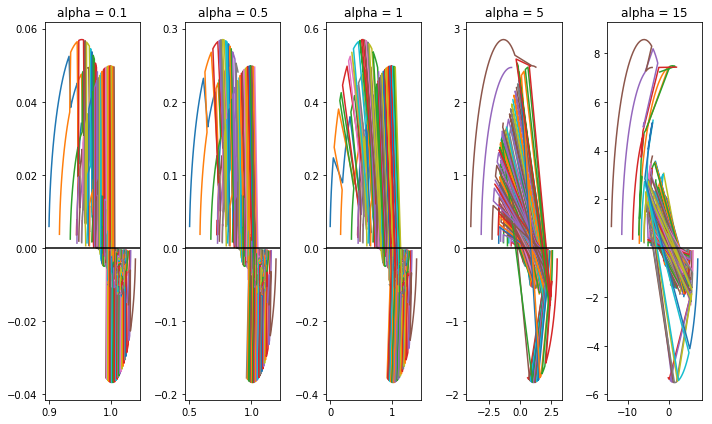

In [13]:
fig2,(ax_1,ax_2,ax_3,ax_4,ax_5) = plt.subplots(1,5, sharey = False, figsize = (10,6))
default_params["alpha"] = 0.1
default_params["speed"] = 10
freq_model, frequency_response, ev, vv = runforward.run_forward(HCP_brain, default_params, fvec)
ax_1.plot(ev[:,:].real, ev[:,:].imag)
#ax_1.spines["left"].set_position("zero")
#ax_1.spines["right"].set_color("none")
#ax_1.spines["bottom"].set_position("zero")
#ax_1.spines["top"].set_color("none")
ax_1.axhline(y=0, color='k')
ax_1.title.set_text("alpha = {}".format(default_params["alpha"]))

default_params["alpha"] = 0.5
freq_model, frequency_response, ev, vv = runforward.run_forward(HCP_brain, default_params, fvec)
ax_2.plot(ev[:,:].real, ev[:,:].imag)
#ax_2.spines["left"].set_position("zero")
#ax_2.spines["right"].set_color("none")
#ax_2.spines["bottom"].set_position("zero")
#ax_2.spines["top"].set_color("none")
ax_2.axhline(y=0, color='k')
ax_2.title.set_text("alpha = {}".format(default_params["alpha"]))

default_params["alpha"] = 1
freq_model, frequency_response, ev, vv = runforward.run_forward(HCP_brain, default_params, fvec)
ax_3.plot(ev[:,:].real, ev[:,:].imag)
#ax_3.spines["left"].set_position("zero")
#ax_3.spines["right"].set_color("none")
#ax_3.spines["bottom"].set_position("zero")
#ax_3.spines["top"].set_color("none")
ax_3.axhline(y=0, color='k')
ax_3.title.set_text("alpha = {}".format(default_params["alpha"]))

default_params["alpha"] = 5
freq_model, frequency_response, ev, vv = runforward.run_forward(HCP_brain, default_params, fvec)
ax_4.plot(ev[:,:].real, ev[:,:].imag)
#ax_4.spines["left"].set_position("zero")
#ax_4.spines["right"].set_color("none")
#ax_4.spines["bottom"].set_position("zero")
#ax_4.spines["top"].set_color("none")
ax_4.axhline(y=0, color='k')
ax_4.title.set_text("alpha = {}".format(default_params["alpha"]))

default_params["alpha"] = 15
freq_model, frequency_response, ev, vv = runforward.run_forward(HCP_brain, default_params, fvec)
ax_5.plot(ev[:,:].real, ev[:,:].imag)
#ax_5.spines["left"].set_position("zero")
#ax_5.spines["right"].set_color("none")
#ax_5.spines["bottom"].set_position("zero")
#ax_5.spines["top"].set_color("none")
ax_5.axhline(y=0, color='k')
ax_5.title.set_text("alpha = {}".format(default_params["alpha"]))
plt.tight_layout()

### Plot the spectrum of the following: $[j\omega I + L_{\alpha}(\omega)]^{-1}$

In [46]:
def basic_diffusive_laplacian(alpha, freqs, speed, C, D):
    nroi = C.shape[0]
    ev_spectrum = []
    rowdegree = np.transpose(np.sum(C, axis=1))
    coldegree = np.sum(C, axis=0)

    qind = rowdegree + coldegree < 0.2*np.mean(rowdegree + coldegree)
    rowdegree[qind] = np.inf
    coldegree[qind] = np.inf
    Tau = 0.001*D/speed
    for freq in freqs:
        w = 2 * np.pi * freq
        Cc = C*np.exp(-1j*Tau*w)
        L1 = np.identity(nroi)
        L2 = np.divide(1, np.sqrt(np.multiply(rowdegree,coldegree))+np.spacing(1))
        L = L1 - alpha*np.matmul(np.diag(L2),Cc)
        
        d, v = np.linalg.eig(L)
        ev_ind = np.argsort(np.abs(d))
        eig_vec = v[:,ev_ind]
        sorted_eigvalues = d[ev_ind]
        
        #ev_resp = np.zeros([nroi,1])
        for k in np.arange(0,nroi):
            freq_spec = np.divide(1,1j*w+sorted_eigvalues[k])
            #ev_resp[k] = freq_spec
            ev_spectrum.append(freq_spec)
        
    fullspectrum = np.asarray(ev_spectrum)
    fullspectrum = np.reshape(fullspectrum,(86,len(freqs)))
    return fullspectrum

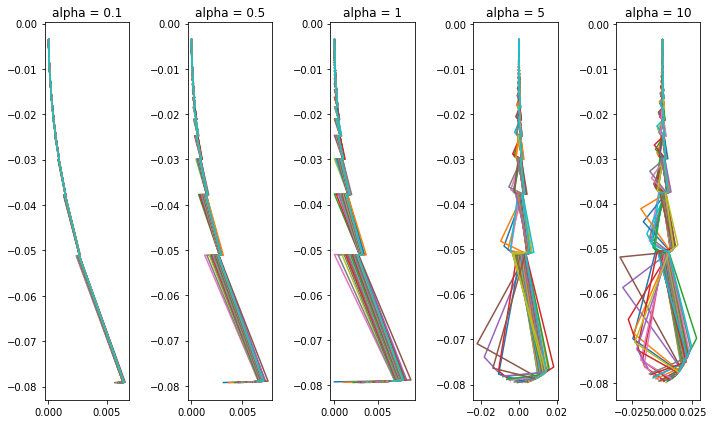

In [47]:
fig_d,(d1,d2,d3,d4,d5) = plt.subplots(1,5, sharey = False, figsize = (10,6))
default_params["speed"] = 10
default_params["alpha"] = 0.1
fullspectrum = basic_diffusive_laplacian(alpha = default_params["alpha"], freqs = fvec, speed = default_params["speed"], C = HCP_brain.reducedConnectome,D = HCP_brain.distance_matrix)
d1.plot(fullspectrum.real, fullspectrum.imag)
#a1.spines["left"].set_position("zero")
#a1.spines["right"].set_color("none")
#a1.spines["bottom"].set_position("zero")
#a1.spines["top"].set_color("none")
d1.title.set_text("alpha = {}".format(default_params["alpha"]))

default_params["alpha"] = 0.5
fullspectrum = basic_diffusive_laplacian(alpha = default_params["alpha"], freqs = fvec, speed = default_params["speed"], C = HCP_brain.reducedConnectome,D = HCP_brain.distance_matrix)
d2.plot(fullspectrum.real, fullspectrum.imag)
#a1.spines["left"].set_position("zero")
#a1.spines["right"].set_color("none")
#a1.spines["bottom"].set_position("zero")
#a1.spines["top"].set_color("none")
d2.title.set_text("alpha = {}".format(default_params["alpha"]))

default_params["alpha"] = 1
fullspectrum = basic_diffusive_laplacian(alpha = default_params["alpha"], freqs = fvec, speed = default_params["speed"], C = HCP_brain.reducedConnectome,D = HCP_brain.distance_matrix)
d3.plot(fullspectrum.real, fullspectrum.imag)
#a1.spines["left"].set_position("zero")
#a1.spines["right"].set_color("none")
#a1.spines["bottom"].set_position("zero")
#a1.spines["top"].set_color("none")
d3.title.set_text("alpha = {}".format(default_params["alpha"]))

default_params["alpha"] = 5
fullspectrum = basic_diffusive_laplacian(alpha = default_params["alpha"], freqs = fvec, speed = default_params["speed"], C = HCP_brain.reducedConnectome,D = HCP_brain.distance_matrix)
d4.plot(fullspectrum.real, fullspectrum.imag)
#a1.spines["left"].set_position("zero")
#a1.spines["right"].set_color("none")
#a1.spines["bottom"].set_position("zero")
#a1.spines["top"].set_color("none")
d4.title.set_text("alpha = {}".format(default_params["alpha"]))

default_params["alpha"] = 10
fullspectrum = basic_diffusive_laplacian(alpha = default_params["alpha"], freqs = fvec, speed = default_params["speed"], C = HCP_brain.reducedConnectome,D = HCP_brain.distance_matrix)
d5.plot(fullspectrum.real, fullspectrum.imag)
#a1.spines["left"].set_position("zero")
#a1.spines["right"].set_color("none")
#a1.spines["bottom"].set_position("zero")
#a1.spines["top"].set_color("none")
d5.title.set_text("alpha = {}".format(default_params["alpha"]))

plt.tight_layout()

### Also look at very low speed ranges, and see how sensitive coupling $\alpha$ is at low speeds
### Plot the frequency spectrum of these diffusive eigenmodes

#### Plot 3 spectra as a function of global coupling, and expand the range to include fMRI 0.1 - 2 hz, 0-2 Alpha range, also take into account the lower speed fMRI regime
#### Take another look at PCA please :) 
    - EigenVector of complex laplacian
    - Simplified basic diffusion model 
    - Spectra of SCFC - spectral graph model

### First spectral graph model because we already have it:

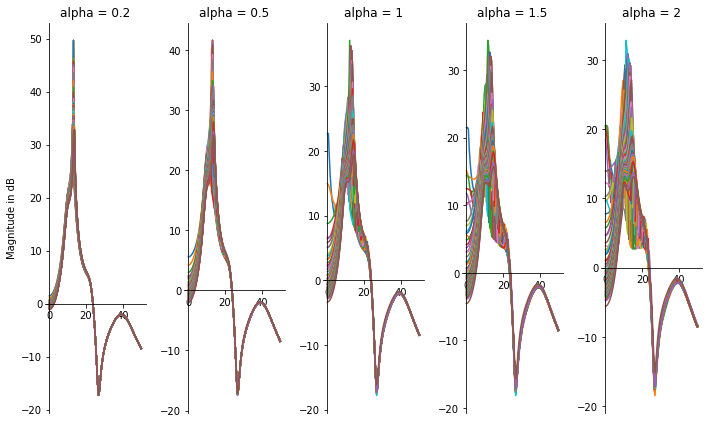

In [48]:
# expand frequency range: 
fvlow = np.linspace(0.1,50,100)
# define parameters:
default_params["speed"] = 5

fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, sharey = False, figsize = (10,6))
default_params["alpha"] = 0.2
freq_model, frequency_response, ev, vv = runforward.run_forward(HCP_brain, default_params, fvlow)
ax1.plot(fvlow,functions.mag2db(np.abs(frequency_response)))
ax1.spines["left"].set_position("zero")
ax1.spines["right"].set_color("none")
ax1.spines["bottom"].set_position("zero")
ax1.spines["top"].set_color("none")
ax1.title.set_text("alpha = {}".format(default_params["alpha"]))
ax1.set_ylabel("Magnitude in dB")

#plt.subplot(1,5,2)
default_params["alpha"] = 0.5
freq_model, frequency_response, ev, vv = runforward.run_forward(HCP_brain, default_params, fvlow)
ax2.plot(fvlow,functions.mag2db(np.abs(frequency_response)))
ax2.spines["left"].set_position("zero")
ax2.spines["right"].set_color("none")
ax2.spines["bottom"].set_position("zero")
ax2.spines["top"].set_color("none")
ax2.title.set_text("alpha = {}".format(default_params["alpha"]))

#plt.subplot(1,5,3)
default_params["alpha"] = 1
freq_model, frequency_response, ev, vv = runforward.run_forward(HCP_brain, default_params, fvlow)
ax3.plot(fvlow,functions.mag2db(np.abs(frequency_response)))
ax3.spines["left"].set_position("zero")
ax3.spines["right"].set_color("none")
ax3.spines["bottom"].set_position("zero")
ax3.spines["top"].set_color("none")
ax3.title.set_text("alpha = {}".format(default_params["alpha"]))

#plt.subplot(1,5,4)
default_params["alpha"] = 1.5
freq_model, frequency_response, ev, vv = runforward.run_forward(HCP_brain, default_params, fvlow)
ax4.plot(fvlow,functions.mag2db(np.abs(frequency_response)))
ax4.spines["left"].set_position("zero")
ax4.spines["right"].set_color("none")
ax4.spines["bottom"].set_position("zero")
ax4.spines["top"].set_color("none")
ax4.title.set_text("alpha = {}".format(default_params["alpha"]))

#plt.subplot(1,5,5)
default_params["alpha"] = 2
freq_model, frequency_response, ev, vv = runforward.run_forward(HCP_brain, default_params, fvlow)
ax5.plot(fvlow,functions.mag2db(np.abs(frequency_response)))
ax5.spines["left"].set_position("zero")
ax5.spines["right"].set_color("none")
ax5.spines["bottom"].set_position("zero")
ax5.spines["top"].set_color("none")
ax5.title.set_text("alpha = {}".format(default_params["alpha"]))
plt.tight_layout()

### Basic diffusive laplacian:

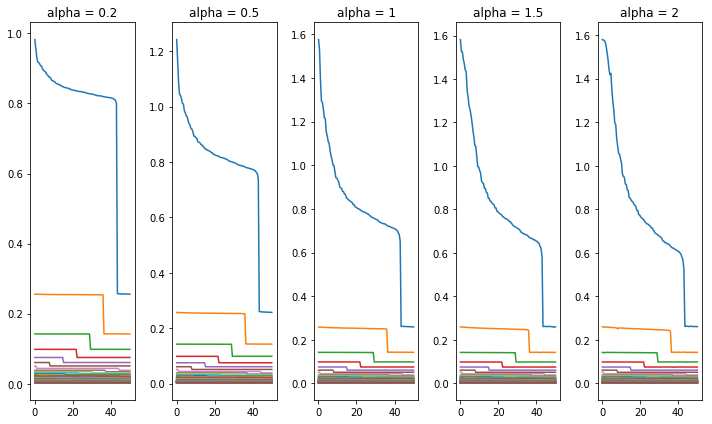

In [52]:
fig_d,(d1,d2,d3,d4,d5) = plt.subplots(1,5, sharey = False, figsize = (10,6))
default_params["speed"] = 5
default_params["alpha"] = 0.2
fullspectrum = basic_diffusive_laplacian(alpha = default_params["alpha"], freqs = fvlow, speed = default_params["speed"], C = HCP_brain.reducedConnectome,D = HCP_brain.distance_matrix)
d1.plot(fvlow, np.transpose(np.abs(fullspectrum)))
#a1.spines["left"].set_position("zero")
#a1.spines["right"].set_color("none")
#a1.spines["bottom"].set_position("zero")
#a1.spines["top"].set_color("none")
d1.title.set_text("alpha = {}".format(default_params["alpha"]))

default_params["alpha"] = 0.5
fullspectrum = basic_diffusive_laplacian(alpha = default_params["alpha"], freqs = fvlow, speed = default_params["speed"], C = HCP_brain.reducedConnectome,D = HCP_brain.distance_matrix)
d2.plot(fvlow, np.transpose(np.abs(fullspectrum)))
#a1.spines["left"].set_position("zero")
#a1.spines["right"].set_color("none")
#a1.spines["bottom"].set_position("zero")
#a1.spines["top"].set_color("none")
d2.title.set_text("alpha = {}".format(default_params["alpha"]))

default_params["alpha"] = 1
fullspectrum = basic_diffusive_laplacian(alpha = default_params["alpha"], freqs = fvlow, speed = default_params["speed"], C = HCP_brain.reducedConnectome,D = HCP_brain.distance_matrix)
d3.plot(fvlow, np.transpose(np.abs(fullspectrum)))
#a1.spines["left"].set_position("zero")
#a1.spines["right"].set_color("none")
#a1.spines["bottom"].set_position("zero")
#a1.spines["top"].set_color("none")
d3.title.set_text("alpha = {}".format(default_params["alpha"]))

default_params["alpha"] = 1.5
fullspectrum = basic_diffusive_laplacian(alpha = default_params["alpha"], freqs = fvlow, speed = default_params["speed"], C = HCP_brain.reducedConnectome,D = HCP_brain.distance_matrix)
d4.plot(fvlow, np.transpose(np.abs(fullspectrum)))
#a1.spines["left"].set_position("zero")
#a1.spines["right"].set_color("none")
#a1.spines["bottom"].set_position("zero")
#a1.spines["top"].set_color("none")
d4.title.set_text("alpha = {}".format(default_params["alpha"]))

default_params["alpha"] = 2
fullspectrum = basic_diffusive_laplacian(alpha = default_params["alpha"], freqs = fvlow, speed = default_params["speed"], C = HCP_brain.reducedConnectome,D = HCP_brain.distance_matrix)
d5.plot(fvlow, np.transpose(np.abs(fullspectrum)))
#a1.spines["left"].set_position("zero")
#a1.spines["right"].set_color("none")
#a1.spines["bottom"].set_position("zero")
#a1.spines["top"].set_color("none")
d5.title.set_text("alpha = {}".format(default_params["alpha"]))

plt.tight_layout()